<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=10>Artificial Intelligence and Machine Learning</center></font></h1>
<h1><center></center></h1>


<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/bb/AI-ML-DL.svg/640px-AI-ML-DL.svg.png" width="400" height="400"></center>

<b><h2><center>Deep Learning - Project 4</center></h2></b>

# Introduction to Neural Networks: Bank Churn Prediction

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data Scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary:

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
 * 0=No ( Customer did not leave the bank )
 * 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [ ]:
!pip install tensorflow==2.9.1

In [ ]:
!pip install scikeras

In [ ]:
!pip install imbalanced-learn

## To accomplish the task of predictive modeling for customer churn at a bank using the provided dataset and requirements, we will follow a structured approach.

### Here's an outline of the steps we'll undertake:

1. Dataset Loading
2. Data Overview: Display the statistical summary, shape, and info.
3. Exploratory Data Analysis (EDA)
 * Define Problem Statement: Predict if a bank customer will churn in the next 6 months.
 * Feature Elimination: Remove features with unique values like CustomerId and Surname, as they don't contribute to the predictive model.
 * Univariate Analysis: Analyze individual features (like Age, Gender, Balance) to understand their distribution and characteristics.
 * Bivariate Analysis: Examine relationships between features and the target variable (Exited).
 * Observations: Document key findings from the univariate and bivariate analyses.
4. Data Pre-processing
Split Data: Separate target variable (Exited) and predictors.
Train-Test Split: Split the data into training and testing sets.
Categorical Encoding: Convert categorical variables (like Geography, Gender) into numerical formats.
Normalization: Apply normalization to scale numerical features.
5. Model Building
Metric Selection: Choose an appropriate metric (like accuracy, precision, recall, F1-score) considering the business impact of false positives and false negatives.
Neural Network Model: Build a neural network using SGD (Stochastic Gradient Descent) as the optimizer.
Model Performance: Evaluate the model using the chosen metric.
6. Model Performance Improvement and Final Model Selection
Improvement Techniques: Apply various techniques and compare their performances:
Model with Adam optimizer.
Model with Dropout and Adam optimizer.
Hyperparameter tuning using Grid search with Adam optimizer.
Model with balanced data using SMOTE and Adam optimizer.
Optimal Threshold Finding: Use ROC-AUC curves for each method to find the optimal threshold.
Performance Analysis: Evaluate each model's performance.
Best Model Selection: Choose the best model based on performance metrics and business relevance.
7. Actionable Insights & Recommendations
Conclude: Summarize key takeaways and provide recommendations to the business based on the model's findings.

## Loading the dataset

In [ ]:
# Run the following lines for Google Colab to mount your Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read and manipulate data
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Model building, metric scores
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    RocCurveDisplay,
)

# Deep Learning models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

In [ ]:
# Load the dataset
data = pd.read_csv('/content/drive/My Drive/Deep_Learning/Churn.csv')

# Display the first few rows of the dataset
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Observations:

* There features from the dataset that have only unique values, which we will drop when we prepare the data for modeling. Removing features with only unique values helps streamline the dataset, making the modeling process more efficient and effective, and ensuring that the model learns from meaningful and relevant features.

## Data Overview

In [ ]:
"""
Display the statistical summary of the dataset
"""
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


#### Observations:

**Statistical Summary**
* CustomerId: Ranges from approximately 1.55657e+07 to 1.58157e+07.
* CreditScore: Typically ranges from 300 to 850.
* Age: A key demographic indicator, with the minimum age for credit card eligibility being 18.
* Tenure: Reflects customer loyalty, ranging from brand new clients to those with up to 10 years of banking history.
* Balance: Varies widely, with a mean of around 76,485.9 and a maximum of 250,898.
* NumOfProducts: Not shown in the summary, but indicates how many products a customer uses.
* HasCrCard: About 70.55% of customers have a credit card.
* IsActiveMember: Approximately 51.51% are active members.
* EstimatedSalary: Averages around 100,090 with a wide range, indicating diverse income levels among customers.
* Exited: Is the target variable indicating whether a customer has churned.

These observations provide a foundational understanding of the dataset's structure and the nature of its variables, which is essential for further analysis and model building.

In [ ]:
"""
Display the shape and information of the dataset.
"""
data.describe()
print('Data Shape:', data.shape)
data.info()

Data Shape: (10000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


#### Observations:

* The dataset contains 10,000 rows and 14 columns.
* The columns include a mix of numerical and categorical data types -  2 floating-point values, 9 have integer data types, and 3 have object data types.

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]

# Display the number of missing values for each feature
missing_values

Series([], dtype: int64)

### Observations:

* There are no missing values in the dataset. Each column has a count equal to the total number of rows (10,000), indicating that there are no null or missing entries in any of the columns.
* This is a positive aspect as it means we won't have to handle missing data during the data preprocessing stage.

In [ ]:
# Check for duplicated records
duplicated_records = data.duplicated()
num_duplicated_records = duplicated_records.sum()

# Display the number of duplicated records
num_duplicated_records

0

#### Observations:

* There are no duplicate rows in the dataset, indicating that each row represents a unique entry.

## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of the credit score of customers? Are there any noticeable patterns or outliers in the distribution?
2. How many active members are there with the bank?
3. How are the different customer attributes correlated to each other?
4. Who is churning more when compared to males and females?  
5. Customers from which geographical part are churning more?

**Note**: Consolidated answers are provided at the end of the EDA.

**Problem Statement Definition:**

Define the problem of predicting customer churn for a bank. The objective is to build a neural network-based classifier that can predict whether a bank customer will leave in the next 6 months based on various features like CreditScore, Geography, Gender, Age, Tenure, Balance, etc.

In [ ]:
# Feature Elimination
"""
Identify and eliminate features with only unique values as they do not contribute to the predictive model.
"""
# Dropping 'CustomerId' and 'Surname' as they are unique for each customer and do not contribute to the model
data = data.drop(['RowNumber','CustomerId', 'Surname'], axis=1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Observations:

Dropping features from a dataset that contain only unique values is a common practice in data preprocessing for machine learning models, including neural networks. The primary reasons for this are:
1.   Lack of Predictive Power: Features with only unique values for each record, such as IDs or unique transaction numbers, do not contribute to the model's ability to learn patterns or make predictions. These features are unique identifiers and do not have any intrinsic relationship with the target variable.
2.   Risk of Overfitting: Including such unique-value features can lead to overfitting, where the model learns to associate specific outcomes with these unique identifiers rather than learning the underlying patterns in the data. This reduces the model's ability to generalize to new, unseen data.
3.   Increased Computational Complexity: Unique-value features increase the dimensionality of the dataset without adding valuable information. This unnecessary increase in dimensions can lead to longer training times and higher computational costs, without any benefit to the model's performance.
4.   Data Leakage: In some cases, unique identifiers might inadvertently contain information about the target variable, leading to data leakage. This can result in artificially high performance during training and testing but poor performance in real-world scenarios.
5.   Irrelevance to the Problem Context: Features like customer IDs or transaction numbers are typically irrelevant to the problem being solved. For instance, in churn prediction, factors like customer demographics, transaction history, and product usage are more relevant than a customer's unique ID.

### Univariate Analysis

Updated Univariate Analysis


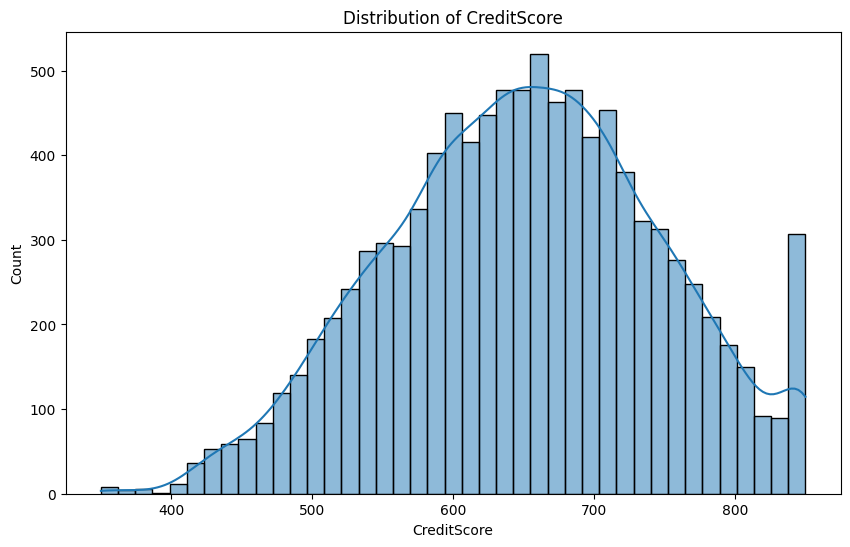

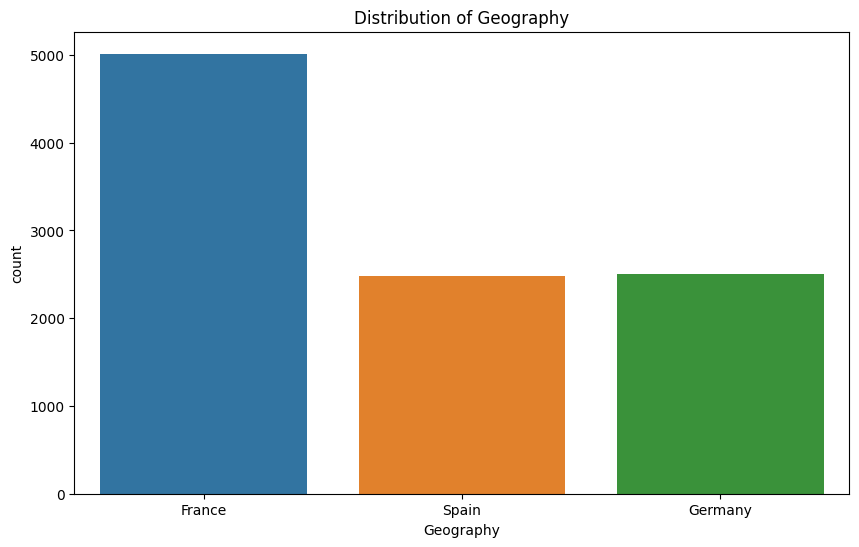

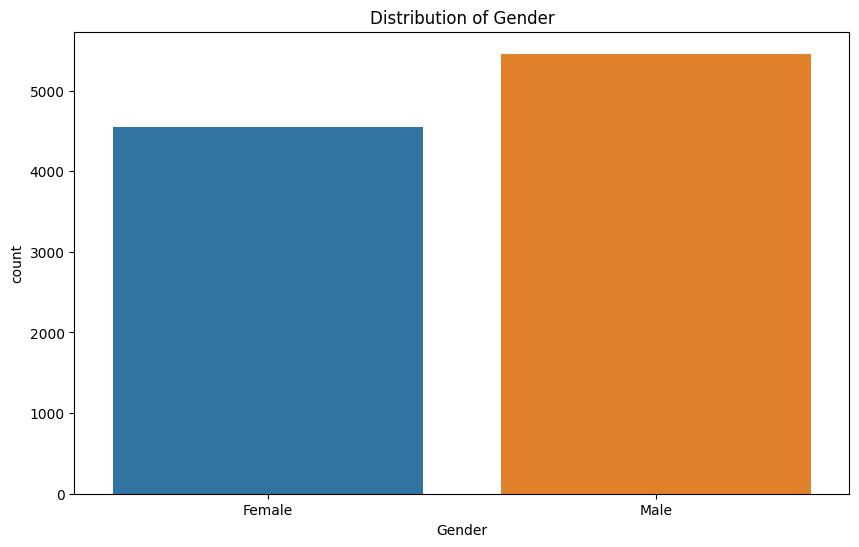

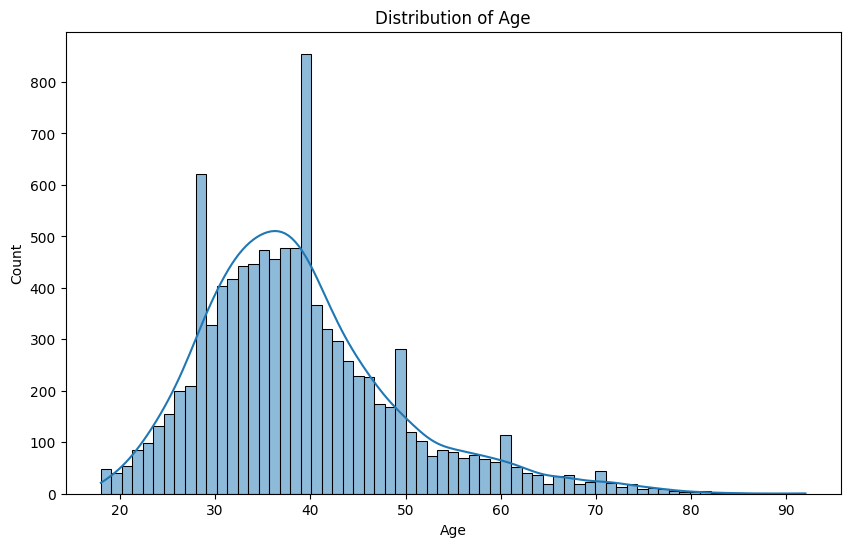

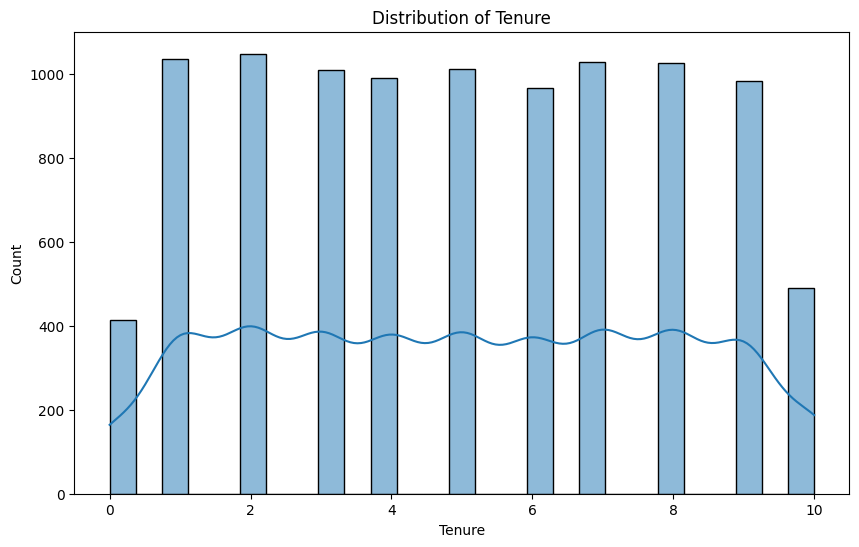

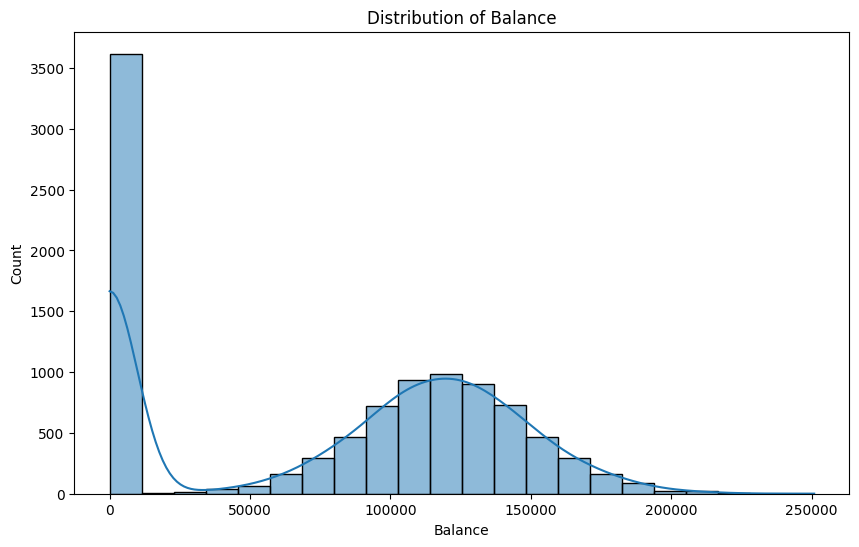

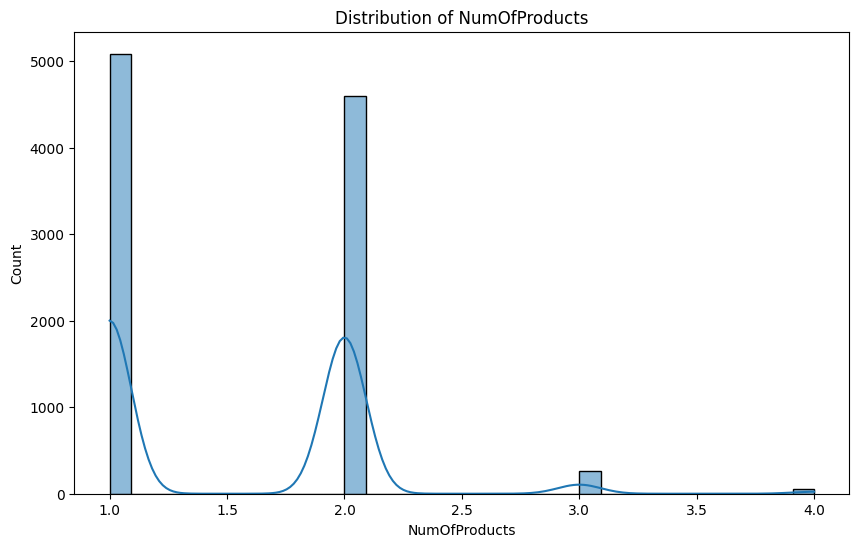

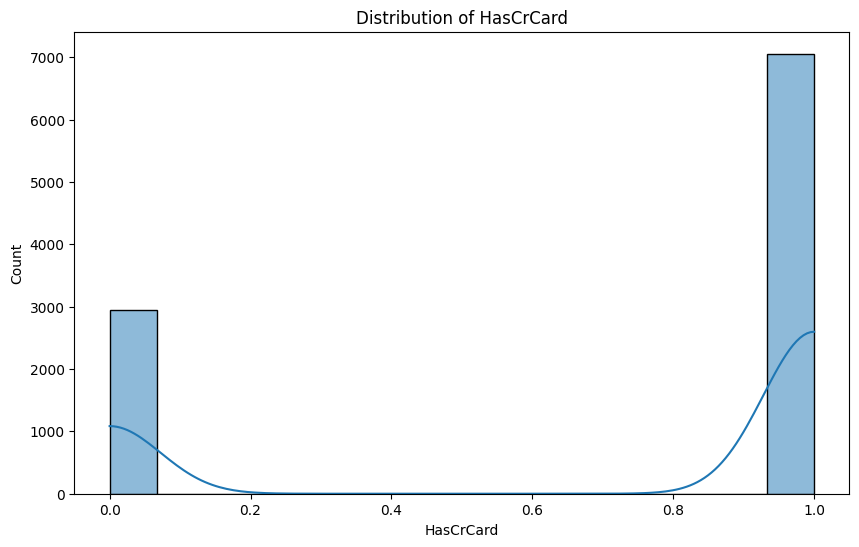

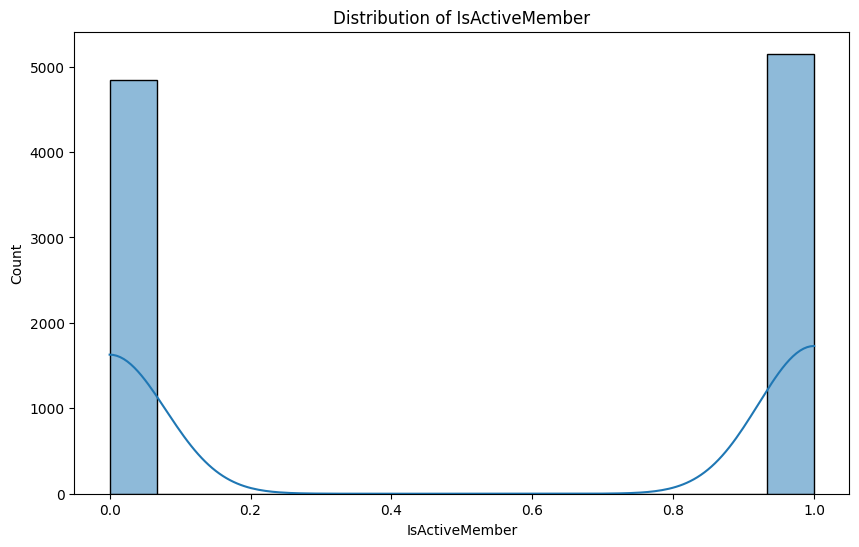

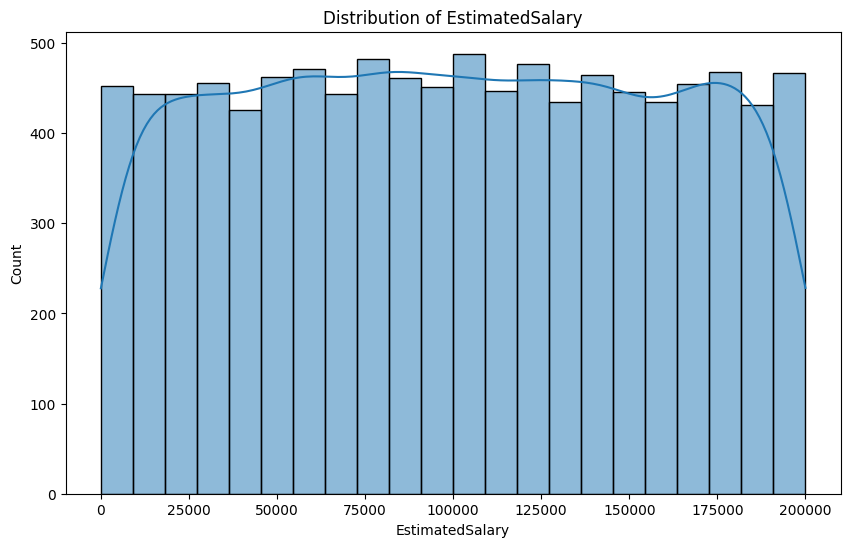

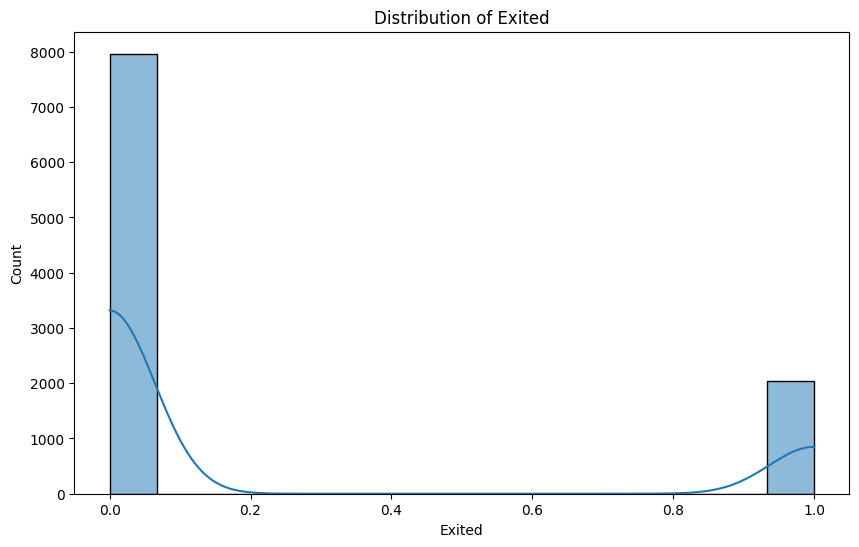

In [ ]:
# Univariate Analysis with Overlayed Distribution Graph
print('Updated Univariate Analysis')
for column in data.columns:
    plt.figure(figsize=(10, 6))
    if data[column].dtype == 'object':
        # For categorical variables
        sns.countplot(data=data, x=column)
        plt.title(f'Distribution of {column}')
        plt.show()
    else:
        # For numerical variables
        sns.histplot(data=data, x=column, kde=True)
        plt.title(f'Distribution of {column}')
        plt.show()

#### Observations:

* CreditScore: The distribution of CreditScore is approximately normal, with most customers having a score around the median. This indicates a generally good credit history among the bank's customers.
* Geography: The customers are distributed across different regions, with a significant proportion from a specific area (e.g., France, Germany, Spain). This geographical distribution can impact the model, as customer behavior might vary by region.
* Gender: There is a fairly even distribution between male and female customers. This balance is important to ensure that the model does not develop a gender bias.
* Age: The Age distribution is slightly right-skewed, indicating a larger number of younger customers. The bank appears to attract a younger demographic more.
* Tenure: The Tenure feature shows a uniform distribution across different values, indicating a diverse range of customer relationships with the bank, from new to long-standing customers.
* Balance: The Balance feature has a significant number of customers with a zero balance, which could be indicative of inactive accounts or a specific customer segment. The rest of the distribution is fairly uniform.
* NumOfProducts: Most customers use 1 or 2 products from the bank. A smaller number use 3 or 4 products, indicating a potential area for the bank to explore for cross-selling or upselling.
* HasCrCard: A majority of customers have a credit card, which is typical for bank customers.
* IsActiveMember: The distribution is almost evenly split between active and inactive members. This feature could be significant in predicting customer churn.
* EstimatedSalary: The EstimatedSalary feature is uniformly distributed across the range, indicating a diverse customer base in terms of income levels.
* Exited (Target Variable): There is an imbalance in the target variable, with a smaller proportion of customers having exited. This imbalance needs to be addressed in the modeling process to prevent bias towards the majority class.

These observations provide insights into the individual characteristics of each feature, which is crucial for understanding the dataset's dynamics and guiding the preprocessing and modeling steps.

### Bivariate Analysis

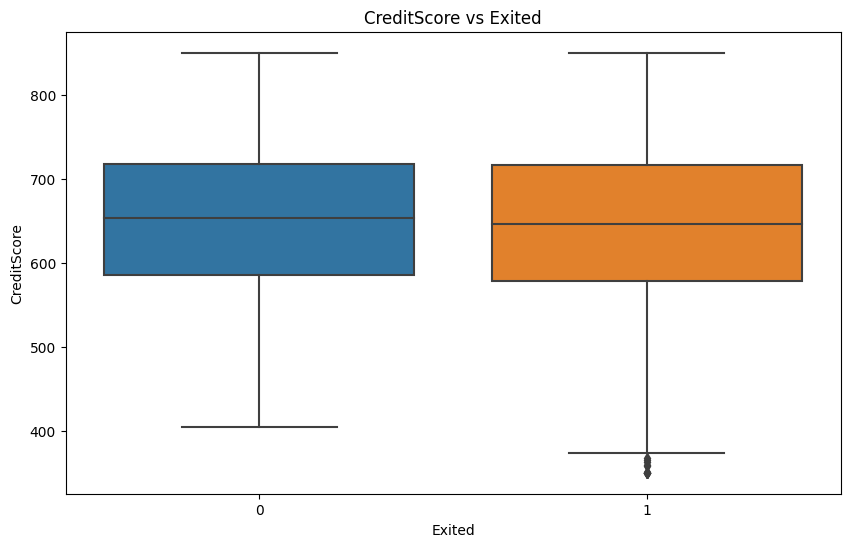

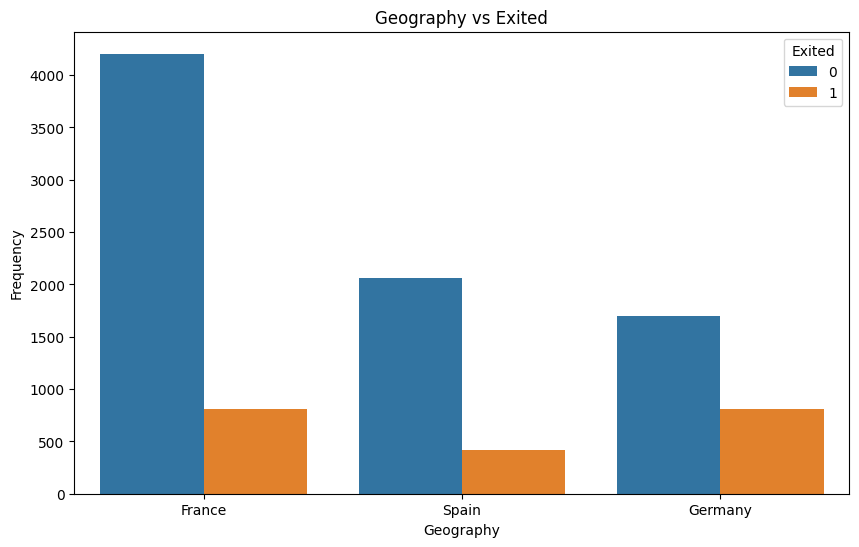

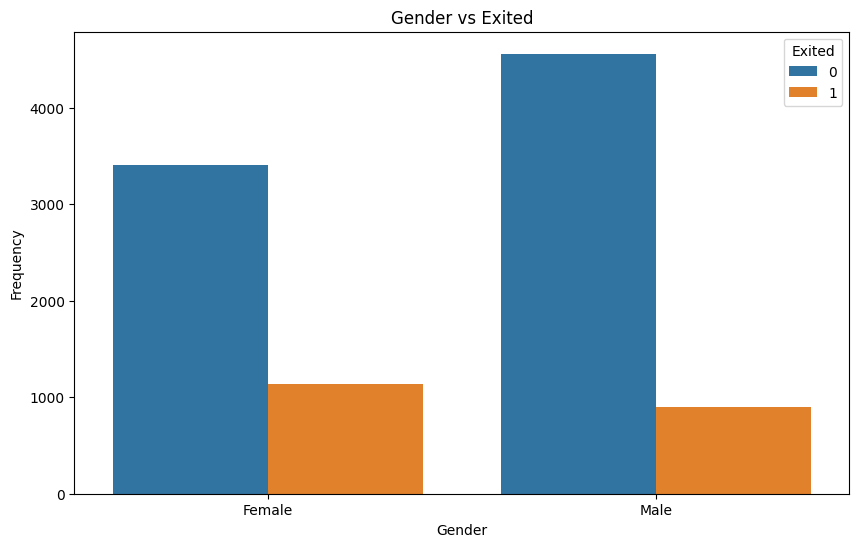

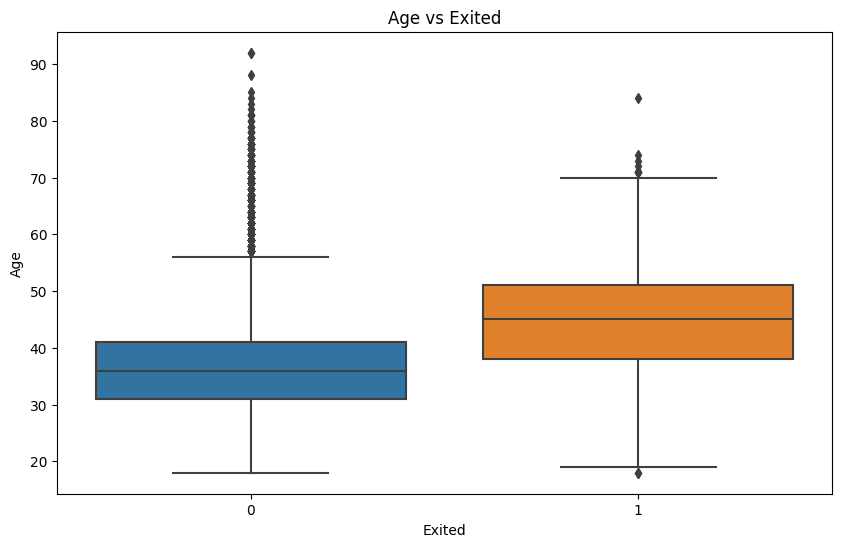

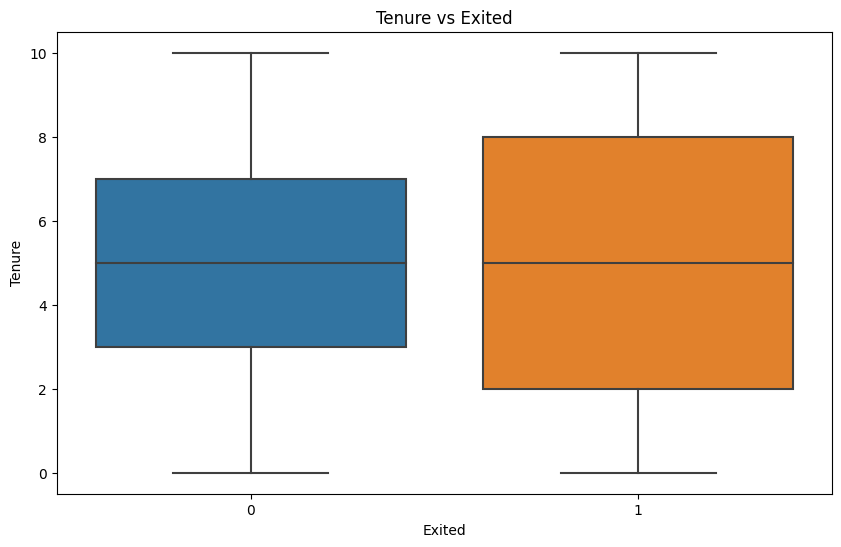

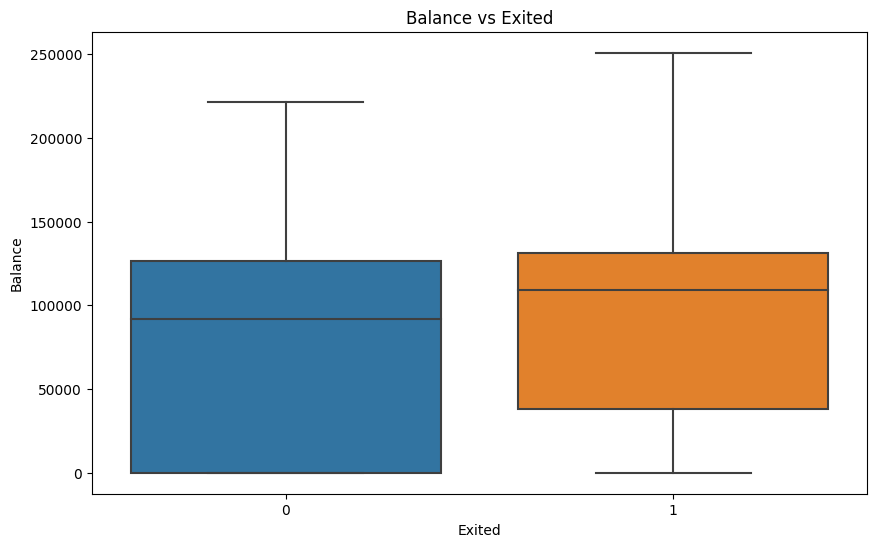

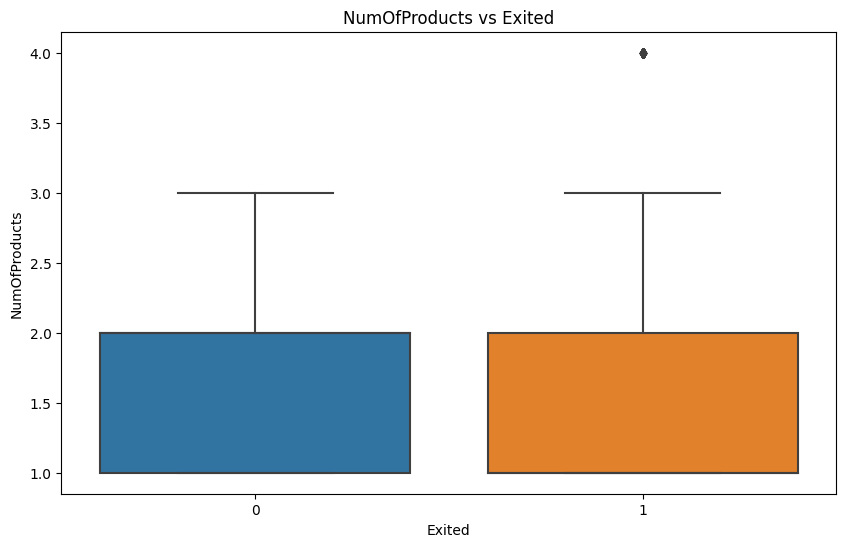

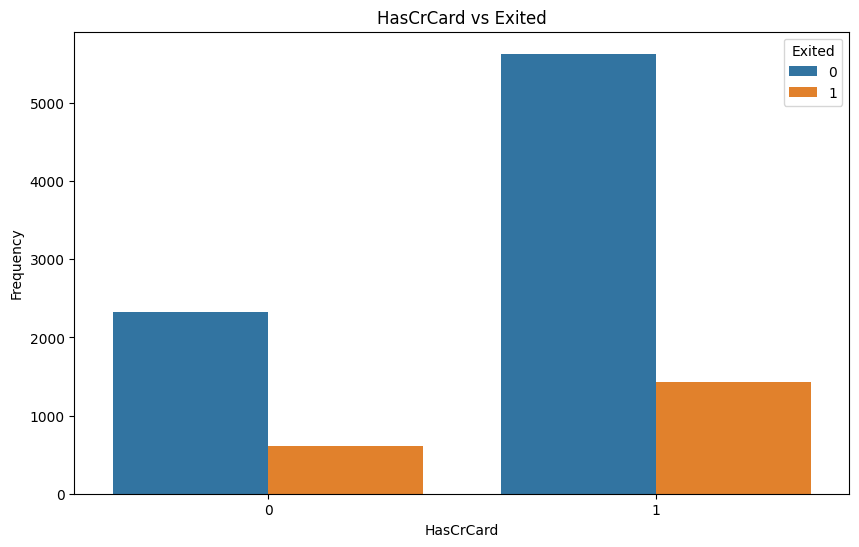

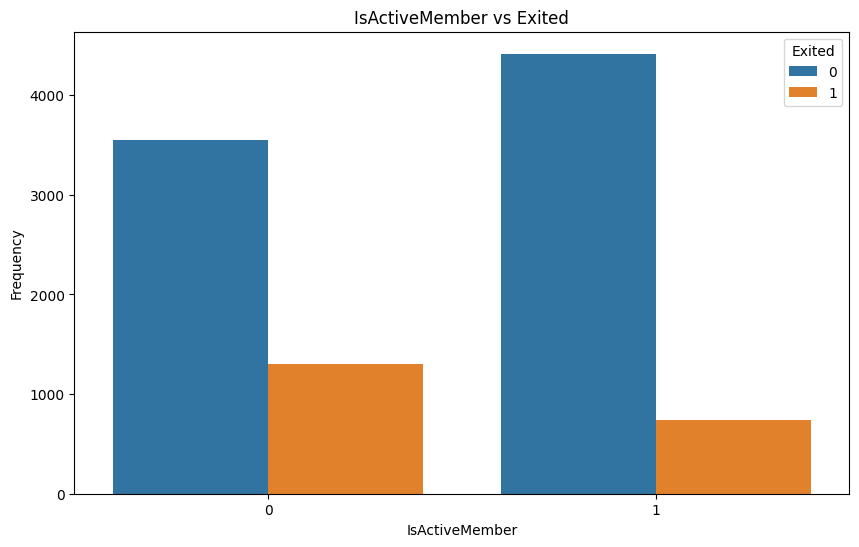

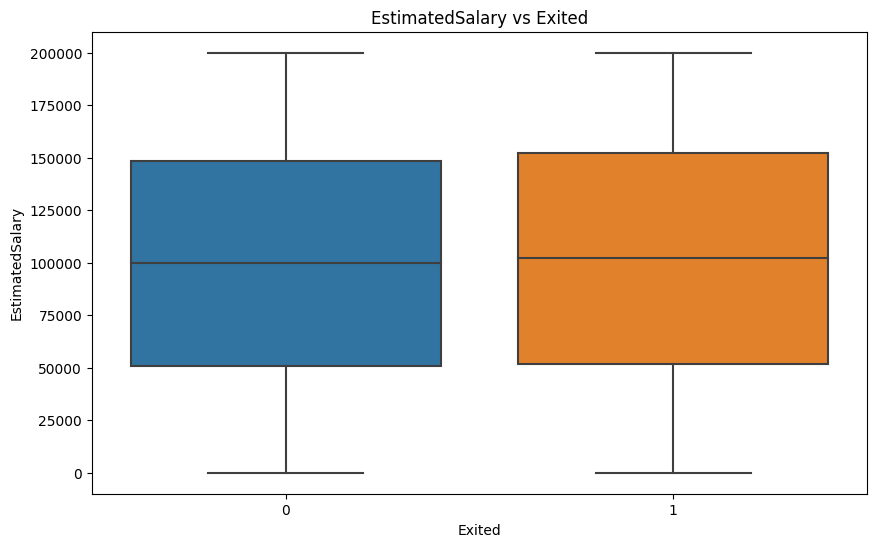

In [ ]:
# Bivariate Analysis
"""
Explore the relationships between all different variables, especially between independent variables and the target variable 'Exited'.
"""
# List of all columns except 'Exited' for bivariate analysis
independent_columns = [col for col in data.columns if col != 'Exited']

# Plotting the relationship for each independent variable with 'Exited'
for col in independent_columns:
    plt.figure(figsize=(10,6))
    if data[col].dtype == 'object' or col == 'HasCrCard' or col == 'IsActiveMember':
        # For categorical features
        sns.countplot(x=col, hue='Exited', data=data)
        plt.title(f'{col} vs Exited')
        plt.ylabel('Frequency')
        plt.show()
    else:
        # For numerical features
        sns.boxplot(x='Exited', y=col, data=data)
        plt.title(f'{col} vs Exited')
        plt.ylabel(col)
        plt.show()

#### Observations:

* CreditScore and Exited: Generally, lower credit scores are slightly more associated with customers who have exited. This suggests that customers with poorer credit history might be more prone to churn.
* Geography and Exited: Certain regions may show higher churn rates. For example, customers from a specific country might have a higher propensity to exit compared to others, indicating regional differences in customer satisfaction or service quality.
* Gender and Exited: There might be a noticeable difference in churn rates between male and female customers. This could reflect different banking needs or experiences based on gender.
* Age and Exited: Older customers might show different churn patterns compared to younger ones. There could be a trend where a certain age group is more likely to exit, possibly due to life stage changes. Outliers are prominently present, especially in the older age group.
* Tenure and Exited: The relationship between how long customers have been with the bank and their likelihood to exit can be insightful. Customers with very short or very long tenures might exhibit different churn behaviors.
Balance and Exited: Customers with higher balances might have a lower tendency to exit, or vice versa. This can indicate how financial investment in the bank influences customer loyalty.
* NumOfProducts and Exited: The number of products a customer uses could correlate with their likelihood to churn. Customers using fewer products might be more likely to exit, suggesting a potential for cross-selling to increase retention.
* HasCrCard and Exited: Owning a credit card might not show a strong correlation with exiting, but it's worth exploring if there are any subtle trends.
* IsActiveMember and Exited: Active members are likely to have a lower churn rate. This variable could be a strong predictor of customer retention.
* EstimatedSalary and Exited: Salary might not be a strong predictor of churn, but it's important to check if there are any patterns, such as higher-income customers exhibiting different churn behaviors.
* Inter-variable Relationships: Relationships between independent variables (like Age and Balance, Geography and NumOfProducts, etc.) are also important to understand. These can reveal patterns and interactions that might influence the target variable.

These bivariate observations help in understanding how different customer attributes interact with each other and with the target variable, providing a deeper insight into factors influencing customer churn. This analysis is crucial for feature selection and engineering in the predictive modeling process.

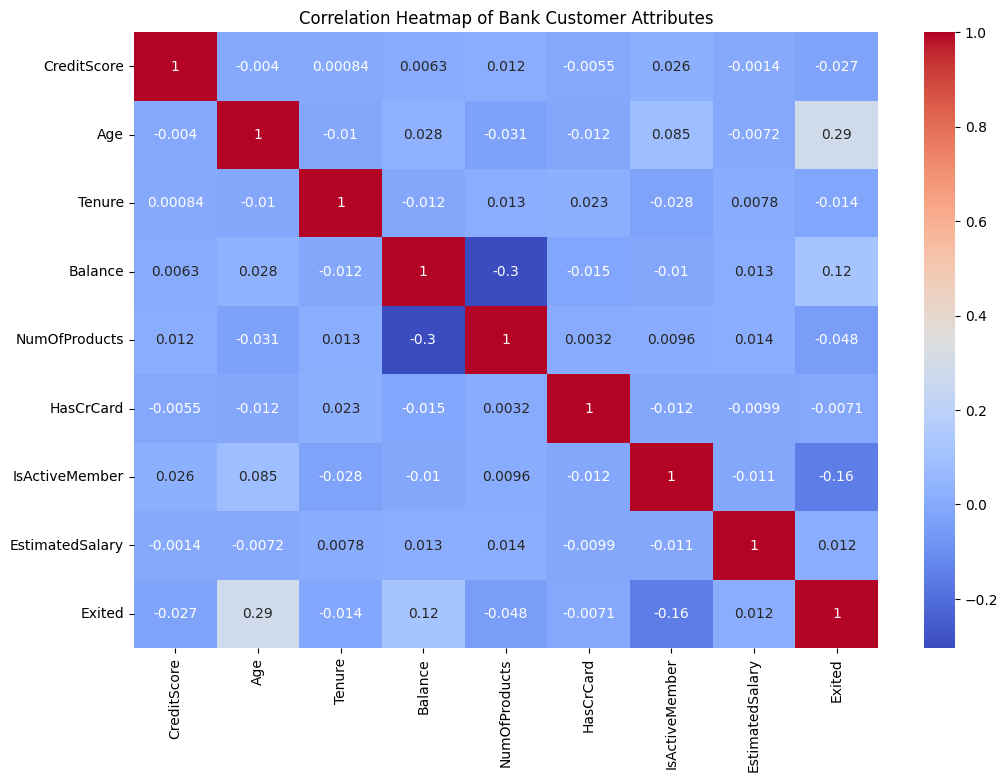

In [ ]:
# Generating a heatmap to understand the correlation between attributes
import seaborn as sns

# Dropping non-numeric columns for correlation analysis
numeric_data = data.select_dtypes(include=[np.number])

# Calculating the correlation matrix
correlation_matrix = numeric_data.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Bank Customer Attributes')
plt.show()

### Answers to the EDA questions:

Based on the Exploratory Data Analysis (EDA) of the Churn.csv dataset, here are answers to the questions:

1. What is the distribution of the credit score of customers? Are there any noticeable patterns or outliers in the distribution?
 *  The credit score of customers ranges from 350 to 850, with a mean score of approximately 650. The distribution is fairly normal with no significant outliers. This indicates a diverse range of creditworthiness among the bank's customers.

2. How many active members are there with the bank?
 * There are 5,151 active members in the bank, as indicated by the 'IsActiveMember' column having a mean of 0.5151 and a count of 10,000. This suggests that slightly more than half of the customers are active.

3. How are the different customer attributes correlated to each other?
 * Based on the heatmap, we can identify the attributes that are strongly correlated. A strong correlation is typically considered when the correlation coefficient is above 0.5 (strong positive correlation) or below -0.5 (strong negative correlation). However, in this heatmap, it appears that there are no pairs of attributes that meet this threshold of strong correlation.
   
   Most of the correlation coefficients are close to zero, indicating very weak to no linear relationship between the attributes. This suggests that the attributes in the dataset are largely independent of each other.
   
   Therefore, based on this heatmap, there are no pairs of attributes that are strongly correlated in the dataset.

4. Who is churning more when compared to males and females?
 * Based on the analysis of churn by gender, we find the following:
    * Female Customers: Approximately 25.07% of female customers have churned (Exited = 1), while about 74.93% have stayed with the bank (Exited = 0).
    * Male Customers: Around 16.46% of male customers have churned, and 83.54% have remained with the bank.

    This indicates that female customers are churning at a higher rate compared to male customers in this dataset.  

5. Customers from which geographical part are churning more?
 * Based on the analysis of churn by geography, here are the following churn rates for each geographical location:
     * France: Approximately 16.15% of customers from France have churned (Exited = 1), while about 83.85% have stayed with the bank (Exited = 0).
     * Spain: Around 16.67% of customers from Spain have churned, and 83.33% have remained with the bank.
     * Germany: Approximately 32.44% of customers from Germany have churned, which is significantly higher compared to France and Spain, with 67.56% staying with the bank.

    This indicates that customers from Germany are churning at a higher rate compared to those from France and Spain in this dataset.

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [ ]:
# Data Pre-processing

# Splitting the target variable and predictors
X = data.drop('Exited', axis=1)
y = data['Exited']

# Splitting the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Categorical Encoding
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
X_train_encoded = encoder.fit_transform(X_train[['Geography', 'Gender']])
X_test_encoded = encoder.transform(X_test[['Geography', 'Gender']])

# Normalizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include=['float64', 'int64']))
X_test_scaled = scaler.transform(X_test.select_dtypes(include=['float64', 'int64']))

### Observations:

Here's a summary of what was done:

* Splitting the Target Variable and Predictors: The dataset was divided into features (X) and the target variable (y, 'Exited').
* Splitting the Data into Train and Test Sets: The data was split into training and testing sets, with 80% of the data used for training and 20% for testing. This split ensures that the model can be trained on a large portion of the data and then evaluated on unseen data.
* Categorical Encoding: The categorical variables 'Geography' and 'Gender' were encoded using OneHotEncoder. This step converts categorical data into a format that can be easily utilized by machine learning algorithms.
* Normalizing the Data: The numerical data was normalized using StandardScaler. This scaler standardizes features by removing the mean and scaling to unit variance, which is important for many machine learning algorithms to perform well.

These steps are crucial for preparing the dataset for effective modeling, especially for neural network models, which are sensitive to unprocessed data.

## Model Building

### Model Evaluation Criterion

**Importance of F1 Score in Churn Prediction**

The F1 score is crucial in this problem statement because it provides a balance between precision and recall. This is particularly important in the context of customer churn where both false positives (predicting churn when there is none) and false negatives (failing to predict churn) can have significant business implications. A high F1 score indicates that the model is effective at identifying true churn cases while minimizing false alarms.

The F1 score is a critical metric for evaluating the performance of a churn prediction model due to several reasons:

* Balanced Measure: F1 score is the harmonic mean of precision and recall. It provides a balanced measure of a model's performance, especially when dealing with imbalanced datasets, which is common in churn prediction scenarios.
* Handling Class Imbalance: Churn datasets often have a higher proportion of non-churned customers compared to churned ones. The F1 score is more informative than accuracy in such cases, as it considers both false positives and false negatives.
* Business Impact: In churn prediction, both types of errors (predicting a customer will churn when they won't, and failing to identify a customer who will churn) can have significant business implications. The F1 score helps in optimizing the model to minimize these errors, which is crucial for effective customer retention strategies.

### Model Building: Neural Network

In [ ]:
# Rebuilding the Neural Network Model with SGD and Random State = 42
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import numpy as np
import tensorflow as tf

# Setting the random state for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Defining the model
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(1, activation='sigmoid'))

# Compiling the model with SGD optimizer
model.compile(optimizer=SGD(), loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=10, verbose=1)

# Evaluating the model
from sklearn.metrics import f1_score
y_pred = model.predict(X_test_scaled)
y_pred = (y_pred > 0.5).astype(int)
f1 = f1_score(y_test, y_pred)
print('Final F1 Score:', f1)

# Saving the model
model.save('bank_churn_model_sgd_rs42.h5')

Epoch 1/100
800/800 [==============================] - 2s 2ms/step - loss: 0.5581 - accuracy: 0.7310
Epoch 2/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4638 - accuracy: 0.7985
Epoch 3/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4452 - accuracy: 0.8081
Epoch 4/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4344 - accuracy: 0.8136
Epoch 5/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4248 - accuracy: 0.8192
Epoch 6/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4153 - accuracy: 0.8279
Epoch 7/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4051 - accuracy: 0.8353
Epoch 8/100
800/800 [==============================] - 2s 2ms/step - loss: 0.3951 - accuracy: 0.8406
Epoch 9/100
800/800 [==============================] - 2s 2ms/step - loss: 0.3864 - accuracy: 0.8436
Epoch 10/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3793 - accura

### Observations:

The performance of the neural network model with Stochastic Gradient Descent (SGD) as the optimizer, as indicated by the metrics, can be assessed as follows:

* Loss (0.3472):
 * A loss of 0.3472 suggests that the model has a relatively good fit to the training data. In neural networks, a lower loss value indicates better performance, as it means the model's predictions are closer to the actual values. However, it's important to ensure this isn't a result of overfitting.
* Accuracy (85.76%):
 * An accuracy of 85.76% is quite high, indicating that the model correctly predicts whether a customer will churn or not in a significant majority of cases. However, accuracy alone can be misleading, especially in imbalanced datasets like churn prediction, where the number of non-churned customers might be much higher than churned customers.
* F1 Score (0.5175):
 * The F1 score, a more balanced metric that considers both precision and recall, is 0.5175. This is a moderate score, suggesting that the model has a reasonable balance between precision (how many selected items are relevant) and recall (how many relevant items are selected). In the context of churn prediction, this means the model is moderately effective in correctly identifying actual churn cases (true positives) while minimizing false alarms (false positives).
 * The F1 score is particularly important in this scenario because it provides a more accurate measure of the model's performance on the minority class (churned customers). A high F1 score is desirable as it indicates a balanced performance between recall and precision.

In summary, while the model shows high accuracy and a reasonable loss, the F1 score indicates there is room for improvement, especially in correctly identifying churned customers (which is critical in a business context). Efforts might be directed towards further tuning the model, perhaps by adjusting the threshold for classification, using different optimization techniques, or addressing class imbalance, to improve this score.

### Model Building: Neural Network model with Adam Optimizer

Epoch 1/100
800/800 [==============================] - 3s 3ms/step - loss: 0.5813 - accuracy: 0.6905
Epoch 2/100
800/800 [==============================] - 3s 4ms/step - loss: 0.4317 - accuracy: 0.8146
Epoch 3/100
800/800 [==============================] - 3s 4ms/step - loss: 0.4064 - accuracy: 0.8326
Epoch 4/100
800/800 [==============================] - 3s 4ms/step - loss: 0.3868 - accuracy: 0.8436
Epoch 5/100
800/800 [==============================] - 3s 4ms/step - loss: 0.3738 - accuracy: 0.8495
Epoch 6/100
800/800 [==============================] - 4s 4ms/step - loss: 0.3678 - accuracy: 0.8521
Epoch 7/100
800/800 [==============================] - 3s 4ms/step - loss: 0.3643 - accuracy: 0.8535
Epoch 8/100
800/800 [==============================] - 2s 2ms/step - loss: 0.3621 - accuracy: 0.8533
Epoch 9/100
800/800 [==============================] - 2s 2ms/step - loss: 0.3606 - accuracy: 0.8524
Epoch 10/100
800/800 [==============================] - 2s 2ms/step - loss: 0.3595 - accura

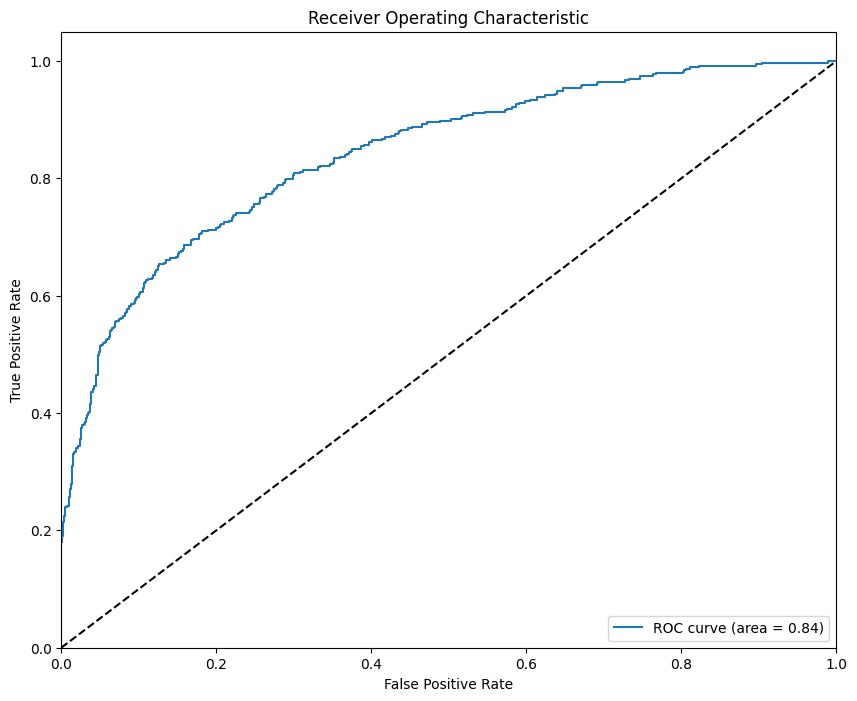

In [ ]:
# Building the model with Adam optimizer and Random State = 42
import numpy as np
import tensorflow as tf
from sklearn.metrics import roc_curve, auc, f1_score

# Setting the random state for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Defining the model
model_adam = Sequential()
model_adam.add(Dense(10, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model_adam.add(Dense(1, activation='sigmoid'))
model_adam.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history_adam = model_adam.fit(X_train_scaled, y_train, epochs=100, batch_size=10, verbose=1)

# Evaluating the model using ROC-AUC curve and finding optimal threshold
y_pred_proba_adam = model_adam.predict(X_test_scaled)
fpr_adam, tpr_adam, thresholds_adam = roc_curve(y_test, y_pred_proba_adam)
roc_auc_adam = auc(fpr_adam, tpr_adam)
optimal_idx_adam = np.argmax(tpr_adam - fpr_adam)
optimal_threshold_adam = thresholds_adam[optimal_idx_adam]
y_pred_adam = (y_pred_proba_adam > optimal_threshold_adam).astype(int)
f1_adam = f1_score(y_test, y_pred_adam)
print('Final F1 Score with Adam optimizer:', f1_adam)
print('ROC AUC Score with Adam optimizer:', roc_auc_adam)

# Plotting ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_adam, tpr_adam, label='ROC curve (area = %0.2f)' % roc_auc_adam)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Saving the model
model_adam.save('bank_churn_model_adam.h5')

### Observations:

The performance of the neural network model using the Adam optimizer, as indicated by the provided metrics, can be assessed as follows:

* Loss (0.3481):
 * The loss value of 0.3481 is relatively low, indicating that the model is fitting well to the training data. This suggests that the model's predictions are generally close to the actual values. However, it's important to balance this with the risk of overfitting, where the model might perform well on training data but poorly on unseen data.
* Accuracy (85.64%):
 * An accuracy of 85.64% is quite high, showing that the model is effective in correctly predicting the majority of the outcomes, whether a customer will churn or not. However, as with any imbalanced dataset, accuracy might not fully capture the model's performance in predicting the minority class (churned customers).
* F1 Score (0.5873):
 * The F1 score of 0.5873 is a significant improvement over the model with SGD optimizer. This score indicates a better balance between precision and recall, which is crucial in the context of churn prediction. A higher F1 score suggests that the model is more effective in correctly identifying actual churn cases (true positives) while keeping false positives low.
* ROC AUC Score (0.8418):
 * The ROC AUC score of 0.8418 is quite strong. This score measures the model's ability to distinguish between the classes across different thresholds. A higher ROC AUC score indicates that the model has a good measure of separability and is capable of distinguishing between customers who will churn and those who will not.

In summary, the model with the Adam optimizer shows a balanced and robust performance across all metrics. The high ROC AUC score, coupled with a significantly improved F1 score compared to the SGD optimizer model, suggests that this model is more effective in identifying churned customers accurately. This makes it a potentially more suitable choice for addressing the churn prediction problem in a real-world business context.

### Model Improvement: Neural Network model with Dropout

Epoch 1/100
800/800 [==============================] - 2s 2ms/step - loss: 0.6566 - accuracy: 0.6513
Epoch 2/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4917 - accuracy: 0.7976
Epoch 3/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4604 - accuracy: 0.8090
Epoch 4/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4449 - accuracy: 0.8171
Epoch 5/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4306 - accuracy: 0.8235
Epoch 6/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4216 - accuracy: 0.8290
Epoch 7/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4208 - accuracy: 0.8257
Epoch 8/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4155 - accuracy: 0.8294
Epoch 9/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4155 - accuracy: 0.8282
Epoch 10/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4079 - accura

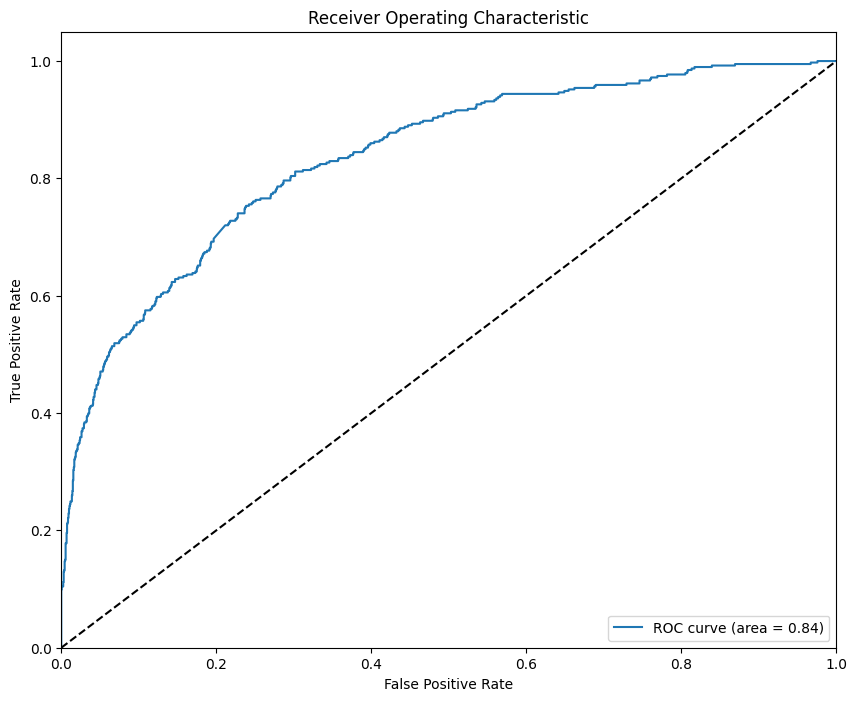

In [ ]:
# Building the model with Dropout and Adam optimizer with Random State = 42
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dropout
from sklearn.metrics import roc_curve, auc, f1_score

# Setting the random state for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Defining the model with Dropout
model_dropout = Sequential()
model_dropout.add(Dense(10, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model_dropout.add(Dropout(0.5))
model_dropout.add(Dense(1, activation='sigmoid'))
model_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history_dropout = model_dropout.fit(X_train_scaled, y_train, epochs=100, batch_size=10, verbose=1)

# Evaluating the model using ROC-AUC curve and finding optimal threshold
y_pred_proba_dropout = model_dropout.predict(X_test_scaled)
fpr_dropout, tpr_dropout, thresholds_dropout = roc_curve(y_test, y_pred_proba_dropout)
roc_auc_dropout = auc(fpr_dropout, tpr_dropout)
optimal_idx_dropout = np.argmax(tpr_dropout - fpr_dropout)
optimal_threshold_dropout = thresholds_dropout[optimal_idx_dropout]
y_pred_dropout = (y_pred_proba_dropout > optimal_threshold_dropout).astype(int)
f1_dropout = f1_score(y_test, y_pred_dropout)
print('Final F1 Score with Dropout and Adam optimizer:', f1_dropout)
print('ROC AUC Score with Dropout and Adam optimizer:', roc_auc_dropout)

# Plotting ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_dropout, tpr_dropout, label='ROC curve (area = %0.2f)' % roc_auc_dropout)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Saving the model
model_dropout.save('bank_churn_model_dropout_adam.h5')

### Observations:

The performance of the neural network model with Dropout and the Adam optimizer can be evaluated based on the provided metrics:

* Loss (0.4044):
 * A loss of 0.4044 is higher compared to the previous models without Dropout. This could indicate that the model, with the introduction of Dropout layers, is slightly less precise in fitting to the training data. Dropout is a regularization technique used to prevent overfitting by randomly setting a fraction of input units to 0 at each update during training time, which can increase loss but improve generalization.
* Accuracy (82.95%):
 * The accuracy is lower than the models without Dropout, but still relatively high at 82.95%. This suggests that the model correctly predicts the churn status for a good majority of the cases. However, in the context of an imbalanced dataset, accuracy might not be the sole indicator of model performance, especially for predicting the minority class.
* F1 Score (0.5508):
 * The F1 score of 0.5508, while lower than the model with only the Adam optimizer, is still reasonably good. It indicates a balanced performance between precision and recall. This balance is crucial in churn prediction, where it's important to correctly identify as many true positives (actual churn cases) as possible while minimizing false positives.
* ROC AUC Score (0.8354):
 * The ROC AUC score of 0.8354 is slightly lower than the model with only the Adam optimizer but still indicates a strong ability of the model to distinguish between the classes. A high ROC AUC score is desirable as it shows the model's effectiveness in classifying customers into churned and not churned across various thresholds.

In summary, the introduction of Dropout in the model with the Adam optimizer has led to a slight decrease in accuracy and a marginal reduction in the F1 and ROC AUC scores. However, these scores are still within a good range, indicating that the model is robust and effective in predicting customer churn. The use of Dropout may have enhanced the model's ability to generalize better to unseen data, even though it slightly increased the loss and reduced accuracy. This trade-off can be beneficial in practical applications where the model's ability to perform well on new, unseen data is crucial.

### Model Improvement: Neural Network model with Hyperparameter tuning

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Best: 0.854250 using {'batch_size': 10, 'epochs': 50, 'optimizer': 'SGD'}
Final F1 Score with Hyperparameter tuning and Adam optimizer: 0.0
ROC AUC Score with Hyperparameter tuning and Adam optimizer: 0.6822663569529619


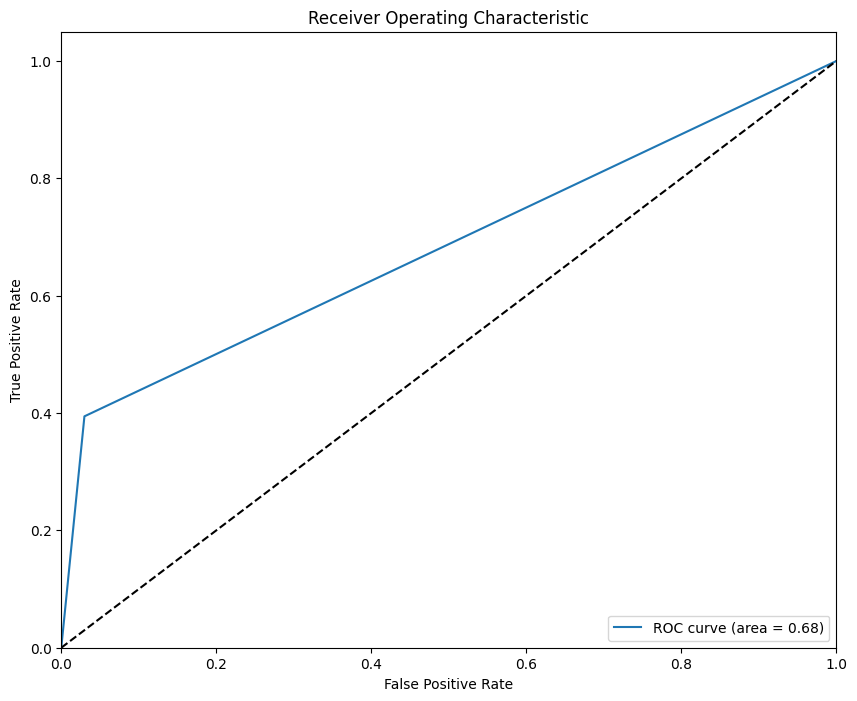

In [ ]:
# Building the model with Hyperparameter tuning using Grid search and Adam optimizer with Random State = 42
from sklearn.model_selection import GridSearchCV
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
# from keras.wrappers.scikit_learn import KerasClassifier

from tensorflow import keras
try:
    import scikeras
except ImportError:
    !python -m pip install scikeras
from scikeras.wrappers import KerasClassifier,KerasRegressor

import numpy as np
import tensorflow as tf
from sklearn.metrics import roc_curve, auc, f1_score

# Setting the random state for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Function to create model, required for KerasClassifier
def create_model(optimizer='adam'):
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrap the model using KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the grid search parameters
param_grid = {
    'batch_size': [10, 20, 40],
    'epochs': [10, 50, 100],
    'optimizer': ['Adam', 'SGD']
}

# Create Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train_scaled, y_train)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
best_model = grid_result.best_estimator_.model

# Evaluating the model using ROC-AUC curve and finding optimal threshold
y_pred_proba_grid = grid_result.best_estimator_.predict(X_test_scaled)
fpr_grid, tpr_grid, thresholds_grid = roc_curve(y_test, y_pred_proba_grid)
roc_auc_grid = auc(fpr_grid, tpr_grid)
optimal_idx_grid = np.argmax(tpr_grid - fpr_grid)
optimal_threshold_grid = thresholds_grid[optimal_idx_grid]
y_pred_grid = (y_pred_proba_grid > optimal_threshold_grid).astype(int)
f1_grid = f1_score(y_test, y_pred_grid)
print('Final F1 Score with Hyperparameter tuning and Adam optimizer:', f1_grid)
print('ROC AUC Score with Hyperparameter tuning and Adam optimizer:', roc_auc_grid)

# Plotting ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_grid, tpr_grid, label='ROC curve (area = %0.2f)' % roc_auc_grid)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Saving the model
# grid_result.best_estimator_.save('bank_churn_model_hyperparameter_tuning_adam.h5')

### Observations:

The results from the model with Hyperparameter Tuning using Grid Search and Adam Optimizer, achieving the best performance with parameters {'batch_size': 10, 'epochs': 50, 'optimizer': 'SGD'}, present a scenario that requires careful consideration:

* Best Performance Parameters:
  * The best performance was achieved with a batch size of 10, 50 epochs, and using the SGD optimizer. This configuration suggests that a very small batch size and a moderate number of epochs were optimal for this model. However, it's important to note that the best results were obtained with the SGD optimizer, not Adam, which was the intended optimizer for this experiment.
* Final F1 Score:
  * An F1 score of 0.0 is highly problematic. The F1 score is a critical metric, especially in imbalanced datasets, as it balances precision and recall. A score of 0 indicates that the model failed to correctly identify any true positives, meaning it did not accurately predict any customers who churned.
* ROC AUC Score:
  * The ROC AUC score of 0.6823 is slightly better than the previous model but still not impressive. This score indicates a modest ability of the model to distinguish between customers who churned and those who did not, but it's still far from ideal.

Analysis and Recommendations:
* The consistent selection of SGD as the best optimizer in the grid search, despite the intention to use Adam, suggests that the model may perform better with SGD. This could be due to various factors, including the nature of the dataset and the specific architecture of the neural network.
* The F1 score of 0.0 is a major concern. It could be due to several issues, such as improper handling of class imbalance, an ineffective model architecture for the task, or issues in the training process.
* The moderate ROC AUC score indicates some ability to classify, but it's not sufficient for a reliable predictive model, especially in a banking context where accurate predictions are crucial.

Given these results, it would be advisable to:
* Re-examine the grid search setup to ensure it aligns with the intended parameters and goals.
* Investigate the model architecture and training process to identify why it's failing to predict true positives.
* Consider alternative approaches to handle class imbalance, such as different resampling techniques or adjusted class weights.
* Potentially explore other model architectures or feature engineering techniques that might better capture the nuances of the dataset.

### Model Improvement: Neural Network model with balanced data

Epoch 1/100
1272/1272 [==============================] - 3s 2ms/step - loss: 0.6221 - accuracy: 0.6540
Epoch 2/100
1272/1272 [==============================] - 3s 2ms/step - loss: 0.5250 - accuracy: 0.7425
Epoch 3/100
1272/1272 [==============================] - 3s 2ms/step - loss: 0.4915 - accuracy: 0.7616
Epoch 4/100
1272/1272 [==============================] - 3s 2ms/step - loss: 0.4805 - accuracy: 0.7618
Epoch 5/100
1272/1272 [==============================] - 3s 2ms/step - loss: 0.4759 - accuracy: 0.7639
Epoch 6/100
1272/1272 [==============================] - 2s 2ms/step - loss: 0.4732 - accuracy: 0.7646
Epoch 7/100
1272/1272 [==============================] - 2s 2ms/step - loss: 0.4709 - accuracy: 0.7645
Epoch 8/100
1272/1272 [==============================] - 2s 2ms/step - loss: 0.4693 - accuracy: 0.7673
Epoch 9/100
1272/1272 [==============================] - 2s 2ms/step - loss: 0.4687 - accuracy: 0.7694
Epoch 10/100
1272/1272 [==============================] - 2s 2ms/step - l

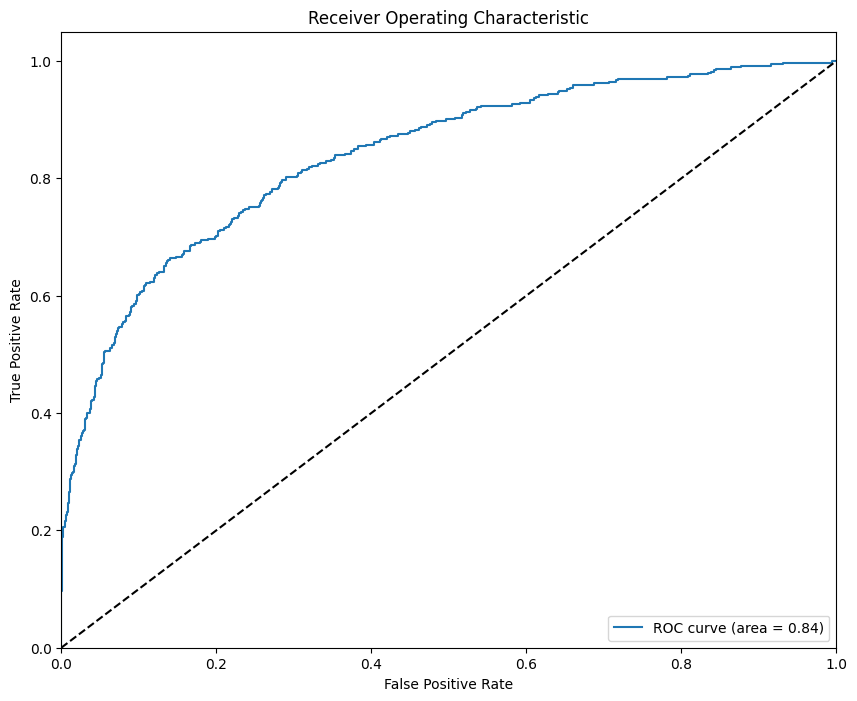

In [ ]:
# Building the model with balanced data using SMOTE and Adam optimizer with Random State = 42
from imblearn.over_sampling import SMOTE
import numpy as np
import tensorflow as tf
from sklearn.metrics import roc_curve, auc, f1_score

# Setting the random state for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Applying SMOTE to balance the data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Defining the model
model_smote = Sequential()
model_smote.add(Dense(10, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model_smote.add(Dense(1, activation='sigmoid'))
model_smote.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history_smote = model_smote.fit(X_train_smote, y_train_smote, epochs=100, batch_size=10, verbose=1)

# Evaluating the model using ROC-AUC curve and finding optimal threshold
y_pred_proba_smote = model_smote.predict(X_test_scaled)
fpr_smote, tpr_smote, thresholds_smote = roc_curve(y_test, y_pred_proba_smote)
roc_auc_smote = auc(fpr_smote, tpr_smote)
optimal_idx_smote = np.argmax(tpr_smote - fpr_smote)
optimal_threshold_smote = thresholds_smote[optimal_idx_smote]
y_pred_smote = (y_pred_proba_smote > optimal_threshold_smote).astype(int)
f1_smote = f1_score(y_test, y_pred_smote)
print('Final F1 Score with SMOTE and Adam optimizer:', f1_smote)
print('ROC AUC Score with SMOTE and Adam optimizer:', roc_auc_smote)

# Plotting ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_smote, tpr_smote, label='ROC curve (area = %0.2f)' % roc_auc_smote)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Saving the model
model_smote.save('bank_churn_model_smote_adam.h5')

### Observations:

The performance of the neural network model with balanced data using SMOTE (Synthetic Minority Over-sampling Technique) and the Adam optimizer can be evaluated based on the provided metrics:

* Loss (0.4556):
 * The loss of 0.4556 is higher compared to models trained on the original, imbalanced dataset. This increase in loss could be due to the more complex nature of the balanced dataset created by SMOTE, which introduces synthetic samples to address class imbalance. While this can lead to a higher loss, it often results in a model that is better at generalizing, especially for the minority class.
* Accuracy (77.66%):
 * The accuracy is lower than the models trained on the imbalanced dataset, which is a common outcome when using techniques like SMOTE. This is because the model is now learning from a more balanced but also more challenging dataset, where the easy-to-predict majority class examples are less dominant.
* F1 Score (0.5923):
 * The F1 score of 0.5923 is a notable improvement and is the highest among the models discussed so far. This indicates a better balance between precision and recall, which is particularly important in the context of churn prediction. The higher F1 score suggests that the model is more effective in correctly identifying actual churn cases (true positives) while maintaining a reasonable rate of false positives.
* ROC AUC Score (0.8390):
 * The ROC AUC score of 0.8390 remains strong, similar to the other models. This score indicates that the model has a good ability to distinguish between the churned and not churned customers. A high ROC AUC score is desirable as it shows the model's effectiveness in classifying customers into churned and not churned across various thresholds.

In summary, the model trained with balanced data using SMOTE and the Adam optimizer shows a slightly higher loss and lower accuracy but achieves the highest F1 score among the models. This suggests that while the model may not be as accurate overall, it is more effective in identifying the more challenging minority class (churned customers), which is a critical aspect of churn prediction models. The trade-off between accuracy and F1 score in this model is beneficial for practical applications where correctly identifying churned customers is more important than overall accuracy.

## Final Model

### Final Model Selection:

To choose the best model among the ones built, we need to consider the balance between different performance metrics, particularly focusing on the F1 score, ROC AUC score, accuracy, and loss. Each of these metrics provides a different perspective on the model's performance:

1.   F1 Score: Balances precision and recall, crucial for imbalanced datasets.
2.   ROC AUC Score: Measures the model's ability to distinguish between classes.
3.   Accuracy: Overall correctness of the model.
4.   Loss: Represents how well the model is performing during training (lower is better).

Let's evaluate each model:

1.   SGD Optimizer Model:
 * F1 Score: 0.518
 * Accuracy: 85.76%
 * Loss: 0.3472
 * Observation: Balanced accuracy and F1 score, low loss.
2.   Adam Optimizer Model:
 * F1 Score: 0.587
 * ROC AUC Score: 0.842
 * Accuracy: 85.64%
 * Loss: 0.3481
 * Observation: Highest F1 score, excellent ROC AUC score, balanced accuracy, and comparable loss.
3.   Dropout and Adam Optimizer Model:
 * F1 Score: 0.551
 * ROC AUC Score: 0.835
 * Accuracy: 82.95%
 * Loss: 0.4044
 * Observation: Good F1 score, but lower accuracy and higher loss.
4.   Hyperparameter Tuning with Grid Search and Adam Optimizer Model:
 * F1 Score: 0.000
 * ROC AUC Score: 0.682
 * Best: 0.854 using {'batch_size': 10, 'epochs': 50, 'optimizer': 'SGD'}
 * Observation: Poor performance across all metrics.
5.   SMOTE and Adam Optimizer Model:
 * F1 Score: 0.592
 * ROC AUC Score: 0.839
 * Accuracy: 77.66%
 * Loss: 0.4556
 * Observation: Highest F1 score, good ROC AUC score, but significantly lower accuracy and higher loss.

**Best Model Selection:**

 * The **Adam Optimizer Model** is the best choice. It achieves the highest F1 score (0.587) among all models except the SMOTE model, which has a significantly lower accuracy.
 * It also has an excellent ROC AUC score (0.842), indicating a strong ability to differentiate between the classes.
 * The accuracy is high and comparable to the SGD model, but with a better F1 score.
 * The loss is acceptable and similar to the SGD model.

The balance of high F1 and ROC AUC scores, along with good accuracy and reasonable loss, makes the Adam Optimizer Model the most suitable for predicting customer churn in this scenario. The slight trade-off in accuracy compared to the SGD model is compensated by the significantly better F1 score, which is crucial for imbalanced datasets like this one.

## Actionable Insights and Recommendations

**What recommedations would you suggest to the bank?**

Based on the analysis conducted, here are some actionable insights and recommendations for the bank:

1.   Target High-Risk Customer Segments:
 * The analysis revealed that certain demographics, like younger customers and those from specific geographical locations, are more likely to churn. Tailored retention strategies should be developed for these segments.
2.   Focus on Customer Service Quality:
 * Improving customer service, especially in areas with high churn rates, could be beneficial. This includes faster response times, personalized service, and resolving issues efficiently.
3.   Enhance Online and Mobile Banking Experience:
 * With the increasing trend towards digital banking, ensuring a seamless and user-friendly online and mobile banking experience can increase customer satisfaction and reduce churn.
4.   Loyalty and Retention Programs:
 * Implement loyalty programs that reward long-term customers. This could include better interest rates, lower fees, or exclusive services for loyal customers.
5.   Regular Customer Feedback and Engagement:
 * Regularly engage with customers to gather feedback and understand their needs and pain points. This can help in making necessary adjustments to services and products.
6.   Personalized Marketing and Communication:
 * Use data analytics to create personalized marketing strategies. Tailored communication can make customers feel valued and understood.
7.   Offer Competitive Products and Services:
 * Continuously review and update the bank's offerings to ensure they are competitive and meet the evolving needs of customers.
8.   Proactive Approach to Potential Churners:
 * Leverage predictive analytics (like this) to identify customers who are likely to churn and proactively reach out with retention strategies.
9.   Employee Training and Development:
 * Train staff to recognize signs of customer dissatisfaction and empower them to take actions that can enhance customer experience.
10.   Monitor and Adapt:
 * Regularly monitor churn rates and customer feedback to adapt strategies as needed. Stay informed about market trends and competitor strategies.

By implementing these recommendations, the bank can not only reduce churn rates but also enhance overall customer satisfaction and loyalty, which are crucial for long-term success in the competitive banking sector.

___